**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Hesus Garcia Cobos
*   MATRÍCULA: A01129778

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set pandas options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set matplotlib inline for Jupyter Notebook
%matplotlib inline

# Set seaborn and matplotlib styles
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

palette = sns.color_palette("muted")
sns.set_palette(palette)

In [3]:
df = pd.read_csv("data/credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.00,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.00,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.00,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.00,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.00,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.00,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.00,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.00,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.00,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)


<div class="alert alert-block alert-warning">

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


La información proporcionada por df.info() no es suficiente para determinar cuáles columnas son cuantitativas y cuáles cualitativas.Aunque df.info() muestra los tipos de datos (int64, float64, object), algunas columnas con tipo object pueden representar datos categóricos, y algunas columnas int64 podrían representarse con tipos más eficientes

In [5]:
df.describe(include='all').T.round(2).sort_values(by='mean', ascending=False)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
person_income,32581.00,NaN,NaN,NaN,66074.85,61983.12,4000.00,38500.00,55000.00,79200.00,6000000.00
loan_amnt,32581.00,NaN,NaN,NaN,9589.37,6322.09,500.00,5000.00,8000.00,12200.00,35000.00
person_age,32581.00,NaN,NaN,NaN,27.73,6.35,20.00,23.00,26.00,30.00,144.00
loan_int_rate,29465.00,NaN,NaN,NaN,11.01,3.24,5.42,7.90,10.99,13.47,23.22
cb_person_cred_hist_length,32581.00,NaN,NaN,NaN,5.80,4.06,2.00,3.00,4.00,8.00,30.00
person_emp_length,31686.00,NaN,NaN,NaN,4.79,4.14,0.00,2.00,4.00,7.00,123.00
loan_status,32581.00,NaN,NaN,NaN,0.22,0.41,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.00,NaN,NaN,NaN,0.17,0.11,0.00,0.09,0.15,0.23,0.83
person_home_ownership,32581,4,RENT,16446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_intent,32581,6,EDUCATION,6453,NaN,NaN,NaN,NaN,NaN,NaN,NaN



A continuación, se presenta una clasificación de las columnas:

### **Columnas Cuantitativas**
| Columna                        | Tipo Original |
|--------------------------------|--------------|
| person_age                     | int64        |
| person_income                  | int64        |
| person_emp_length              | float64      |
| loan_amnt                      | int64        |
| loan_int_rate                  | float64      |
| loan_percent_income            | float64      |
| cb_person_cred_hist_length     | int64        ||

### **Columnas Cualitativas**
| Columna                        | Tipo Original |
|--------------------------------|--------------|
| person_home_ownership          | object       |
| loan_intent                    | object       |
| loan_grade                     | object       |
| cb_person_default_on_file      | object       |
| loan_status                    | int64        |


In [6]:
quantitative_columns = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length'
]

qualitative_columns = [
    'person_home_ownership',
    'loan_intent',
    'loan_grade',
    'cb_person_default_on_file',
    'loan_status'
]

In [7]:
# Uso de memoria antes de la optimización
mem_before = df.memory_usage(deep=True).sum() / 1024 ** 2
print(f"Uso de memoria antes de la optimización: {mem_before:.2f} MB")

# Optimización de tipos de datos
def optimize_types(df):
    for col in df.columns:
        if df[col].dtype == 'int64':
            df[col] = pd.to_numeric(df[col], downcast='integer')
        elif df[col].dtype == 'float64':
            df[col] = pd.to_numeric(df[col], downcast='float')
        elif df[col].dtype == 'object':
            df[col] = df[col].astype('category')
    return df

df = optimize_types(df)

# Uso de memoria después de la optimización
mem_after = df.memory_usage(deep=True).sum() / 1024 ** 2
print(f"Uso de memoria después de la optimización: {mem_after:.2f} MB")
print(f"Reducción de memoria: {100 * (mem_before - mem_after) / mem_before:.2f}%")

Uso de memoria antes de la optimización: 9.62 MB
Uso de memoria después de la optimización: 0.87 MB
Reducción de memoria: 90.94%


<div class="alert alert-block alert-warning">

 2. Determina el porcentaje de valores faltantes por columna.

</div>

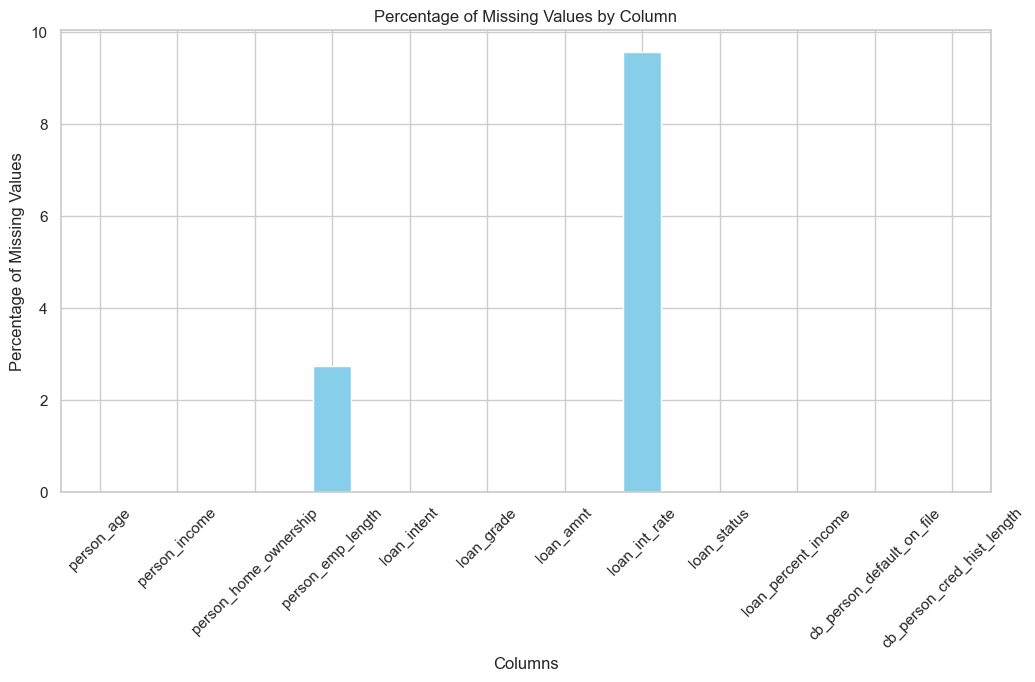

In [8]:
def plot_missing_values_barchart(df):
    # Calculate the percentage of missing values
    missing_percentage = df.isnull().mean() * 100

    # Plot bar chart of missing values percentage
    plt.figure(figsize=(12, 6))
    missing_percentage.plot(kind='bar', color='skyblue')
    plt.title("Percentage of Missing Values by Column")
    plt.xlabel("Columns")
    plt.ylabel("Percentage of Missing Values")
    plt.xticks(rotation=45)
    plt.show()

plot_missing_values_barchart(df)

# Análisis de variables numéricas

<div class="alert alert-block alert-warning">
3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

</div>

In [9]:
def descriptive_statistics(df):
    stats = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        stats[col] = {
            'mean': df[col].mean(),
            'median': df[col].median(),
            'min': df[col].min(),
            'max': df[col].max(),
            'std': df[col].std(),
            '25%': df[col].quantile(0.25),
            '50%': df[col].quantile(0.50),
            '75%': df[col].quantile(0.75),
            'skewness': df[col].skew(),
            'kurtosis': df[col].kurt()
        }
    return pd.DataFrame(stats).T

numeric_stats = descriptive_statistics(df)
display(numeric_stats)

# Clasificación de variables según asimetría y curtosis
def classify_skewness_kurtosis(df, col):
    skewness = df[col].skew()
    kurtosis = df[col].kurt()
    skewness_class = 'Symmetric' if abs(skewness) < 0.5 else 'Moderately Skewed' if abs(skewness) < 1 else 'Highly Skewed'
    kurtosis_class = 'Mesokurtic' if abs(kurtosis) < 1 else 'Leptokurtic' if kurtosis > 1 else 'Platykurtic'
    return skewness_class, kurtosis_class

classification = {
    'person_age': classify_skewness_kurtosis(df, 'person_age'),
    'loan_int_rate': classify_skewness_kurtosis(df, 'loan_int_rate')
}

classification_df = pd.DataFrame(classification, index=['Skewness', 'Kurtosis'])
display(classification_df)

,mean,median,min,max,std,25%,50%,75%,skewness,kurtosis
person_age,27.73,26.00,20.00,144.00,6.35,23.00,26.00,30.00,2.58,18.56
person_income,66074.85,55000.00,4000.00,6000000.00,61983.12,38500.00,55000.00,79200.00,32.87,2693.27
person_emp_length,4.79,4.00,0.00,123.00,4.14,2.00,4.00,7.00,2.61,43.72
loan_amnt,9589.37,8000.00,500.00,35000.00,6322.09,5000.00,8000.00,12200.00,1.19,1.42
loan_int_rate,11.01,10.99,5.42,23.22,3.24,7.90,10.99,13.47,0.21,-0.67
loan_status,0.22,0.00,0.00,1.00,0.41,0.00,0.00,0.00,1.36,-0.14
loan_percent_income,0.17,0.15,0.00,0.83,0.11,0.09,0.15,0.23,1.06,1.22
cb_person_cred_hist_length,5.80,4.00,2.00,30.00,4.06,3.00,4.00,8.00,1.66,3.72


,person_age,loan_int_rate
Skewness,Highly Skewed,Symmetric
Kurtosis,Leptokurtic,Mesokurtic


<div class="alert alert-block alert-warning">


4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

</div>

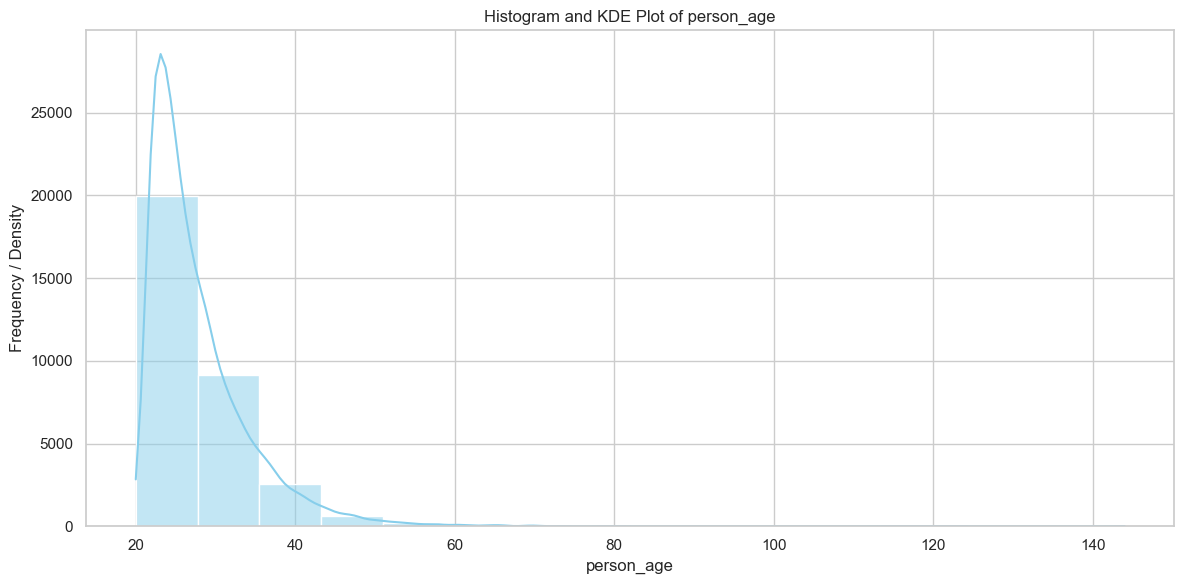

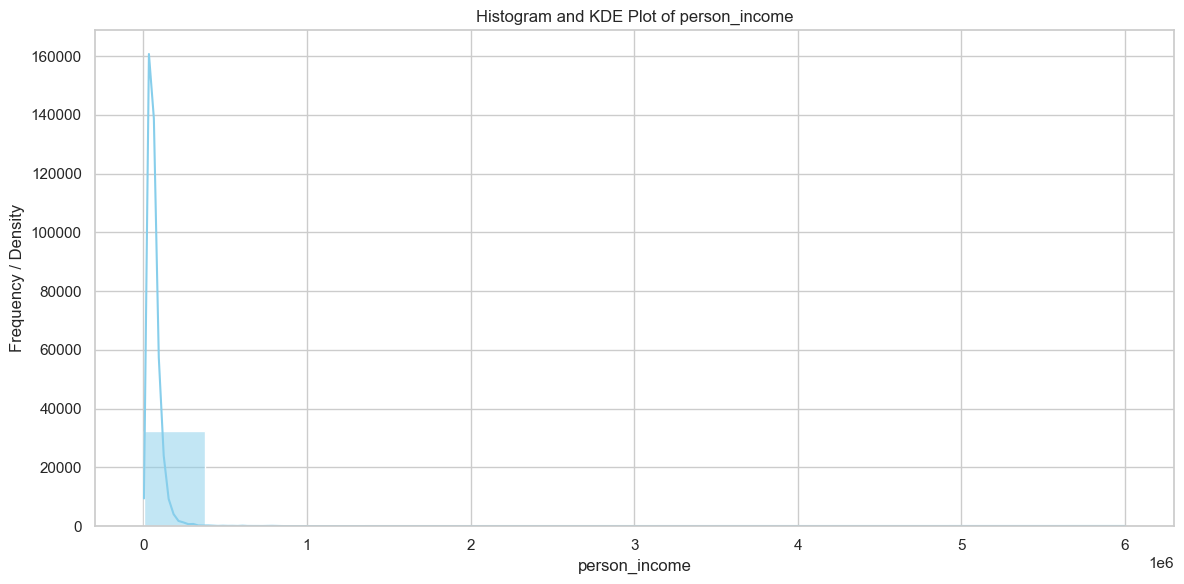

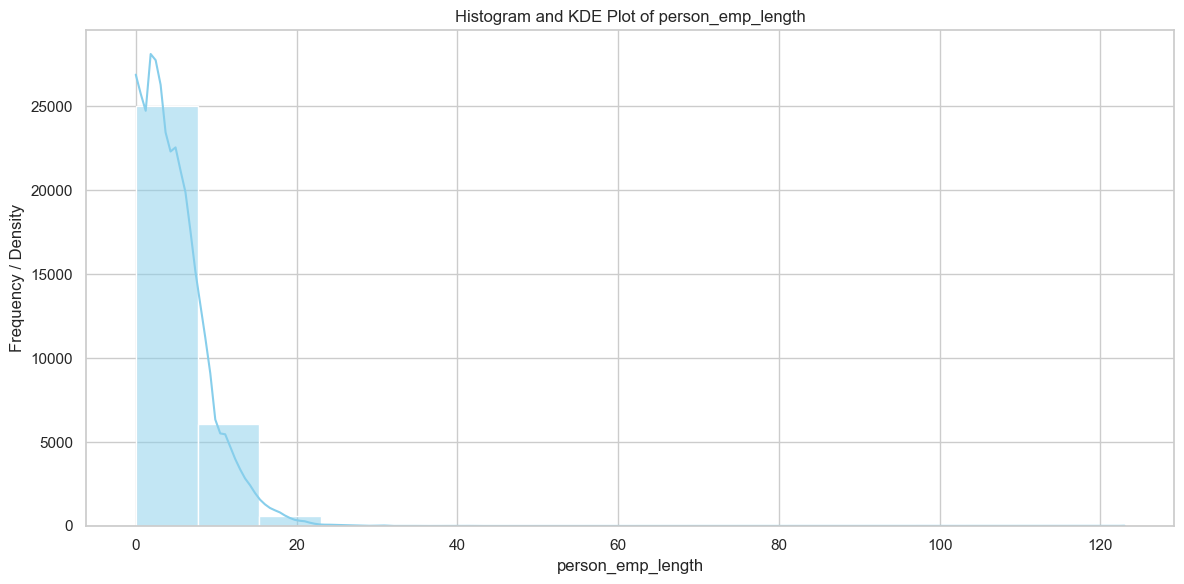

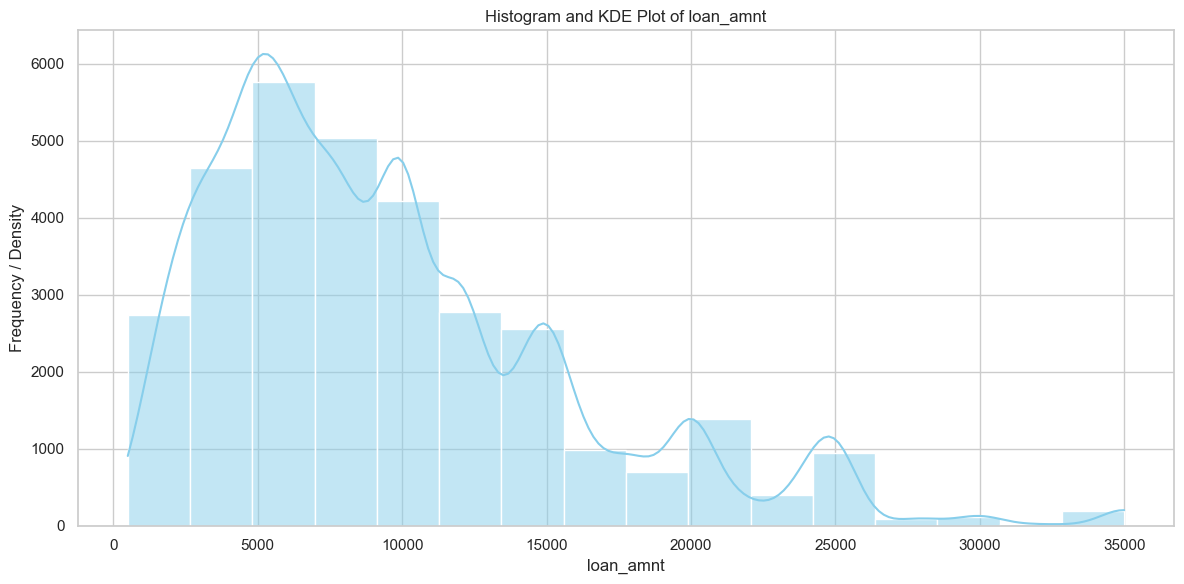

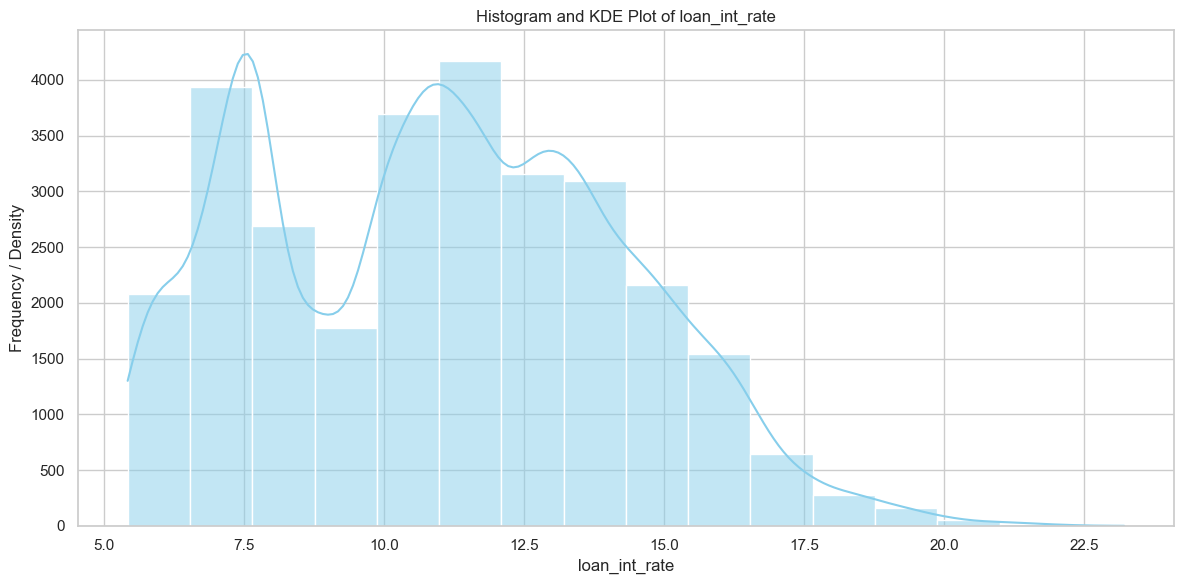

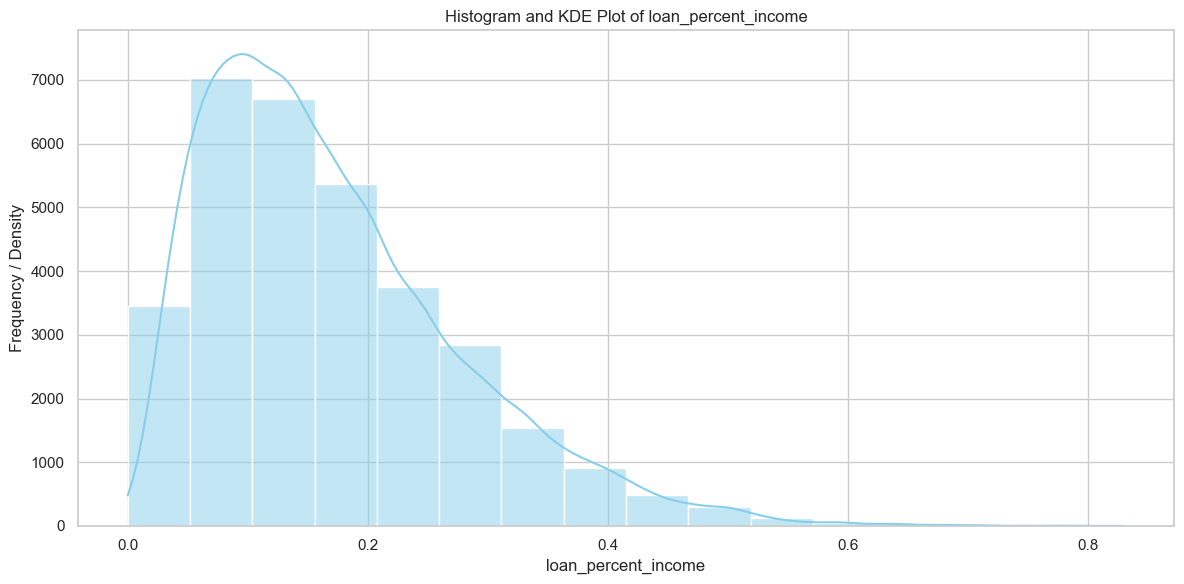

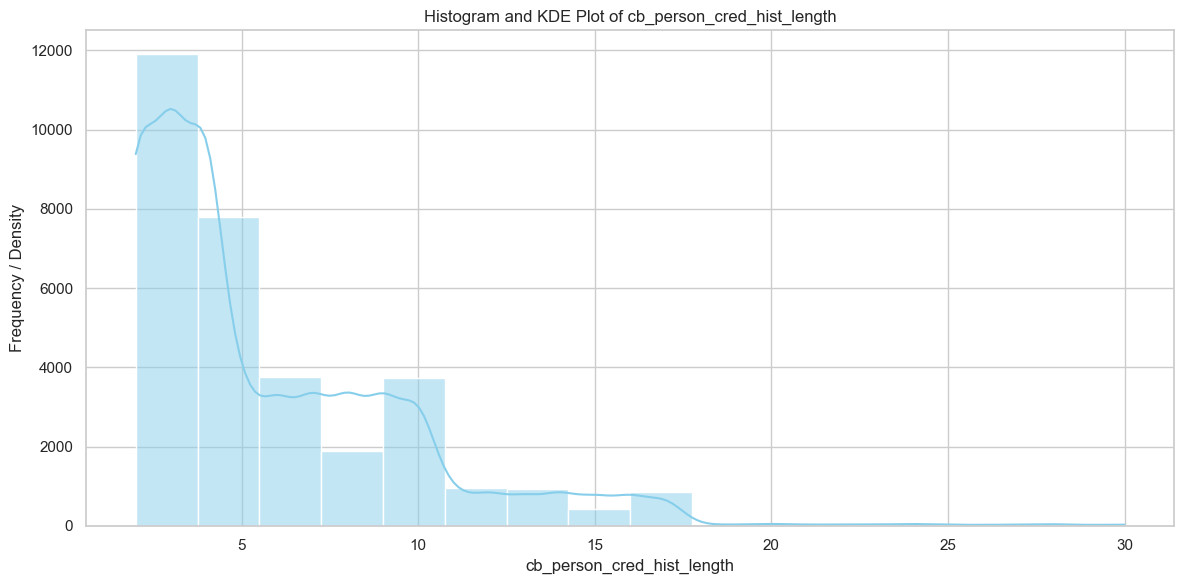

In [10]:
def optimal_bins(data, column):
    values = data[column].dropna()
    n = len(values)

    # Freedman-Diaconis Rule
    q25, q75 = np.percentile(values, [25, 75])
    bin_width_fd = 2 * (q75 - q25) / n ** (1 / 3)
    bins_fd = int((values.max() - values.min()) / bin_width_fd) if bin_width_fd > 0 else 10

    # Sturges Rule
    bins_sturges = int(np.ceil(np.log2(n) + 1))

    # Square Root Rule
    bins_sqrt = int(np.sqrt(n))

    return max(1, min(bins_fd, bins_sturges, bins_sqrt))

def plot_histograms_and_kde(df, quantitative_columns):

    for col in quantitative_columns:
        plt.figure(figsize=(12, 6))

        bins = optimal_bins(df, col)

        sns.histplot(df[col], kde=True, color='skyblue', bins=bins)
        plt.title(f'Histogram and KDE Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency / Density')

        plt.tight_layout()
        plt.show()

plot_histograms_and_kde(df, quantitative_columns)


<div class="alert alert-block alert-warning">

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

</div>

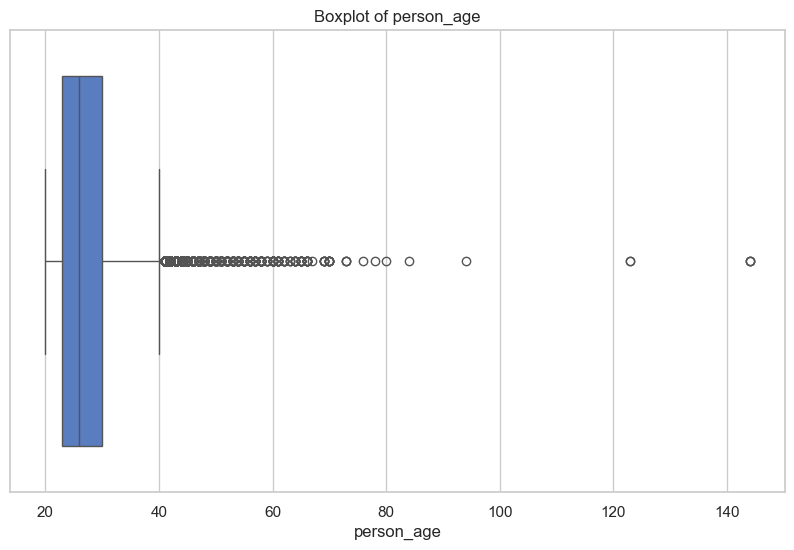

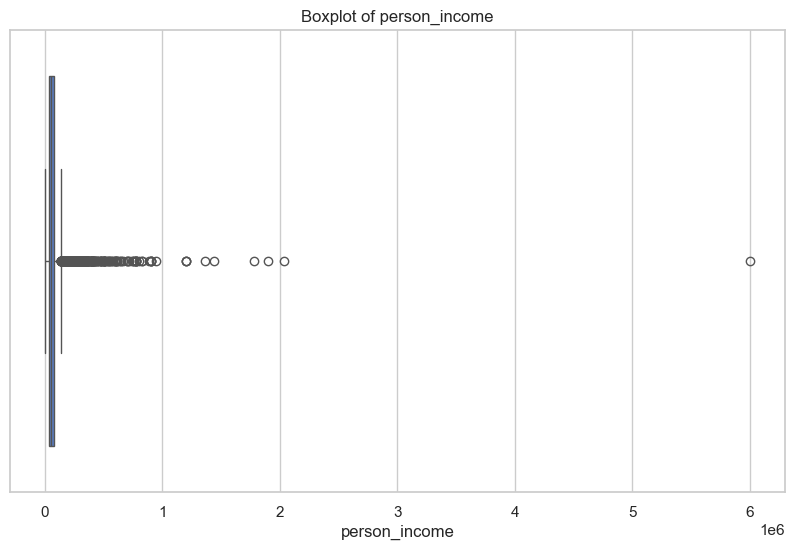

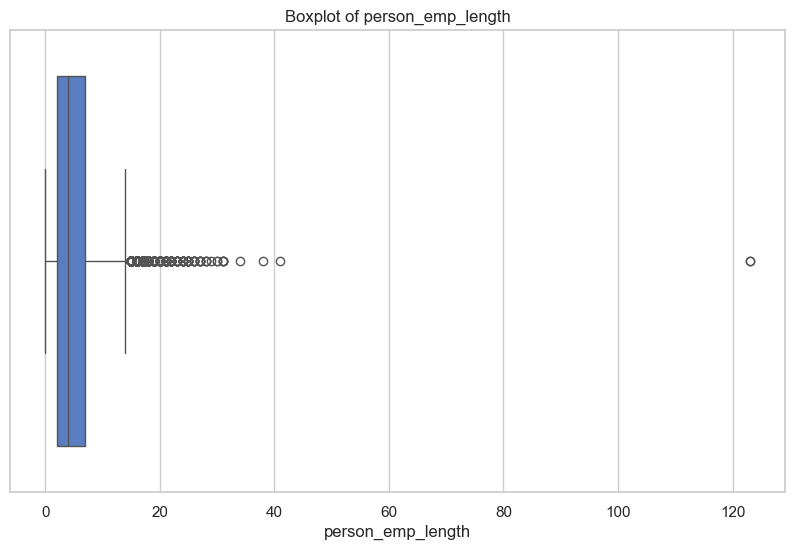

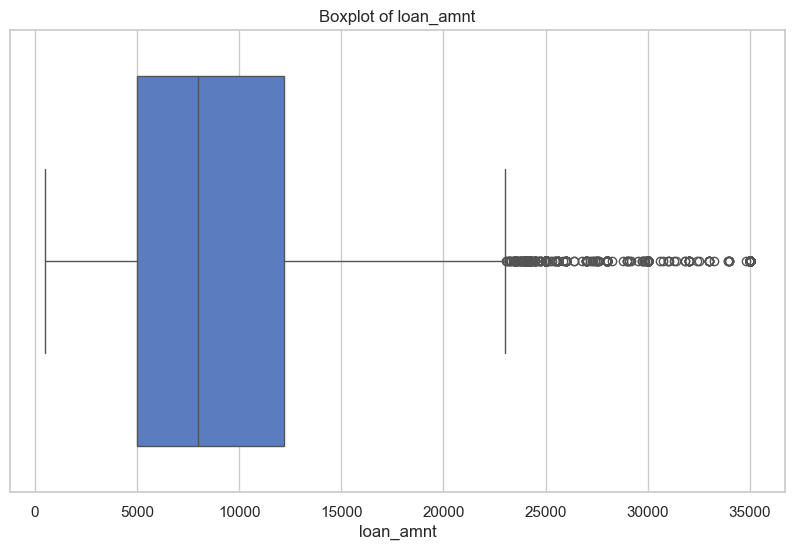

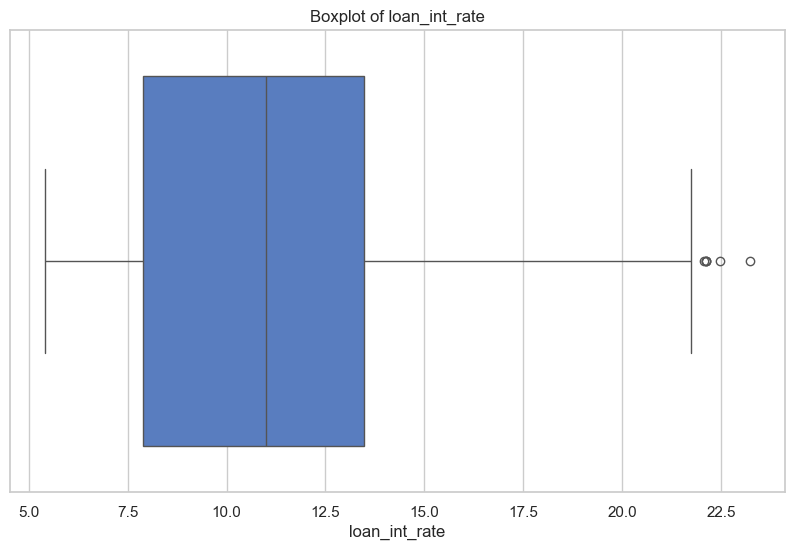

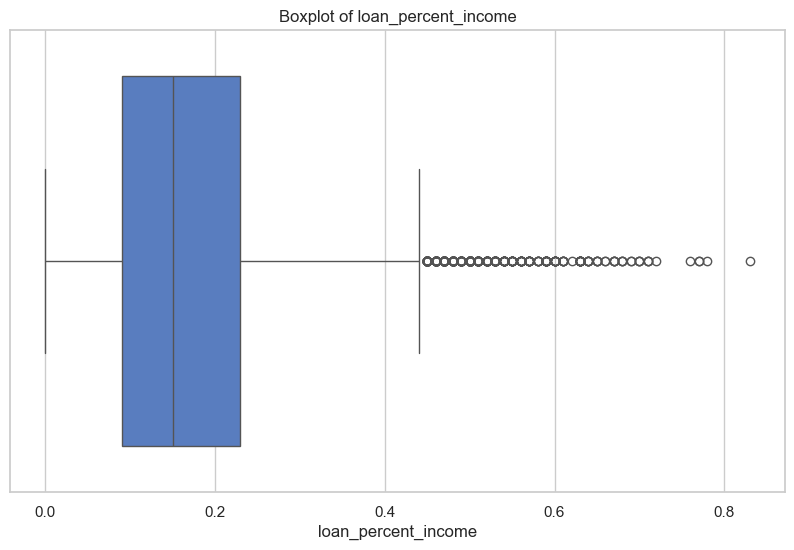

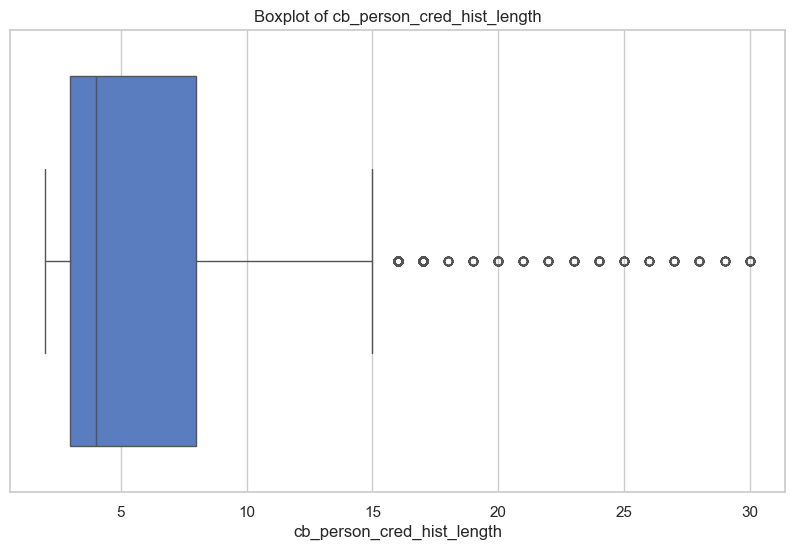

In [11]:
def plot_boxplots(df, columns):

    for col in columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        plt.show()

plot_boxplots(df, quantitative_columns)

<div class="alert alert-block alert-warning">

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

</div>

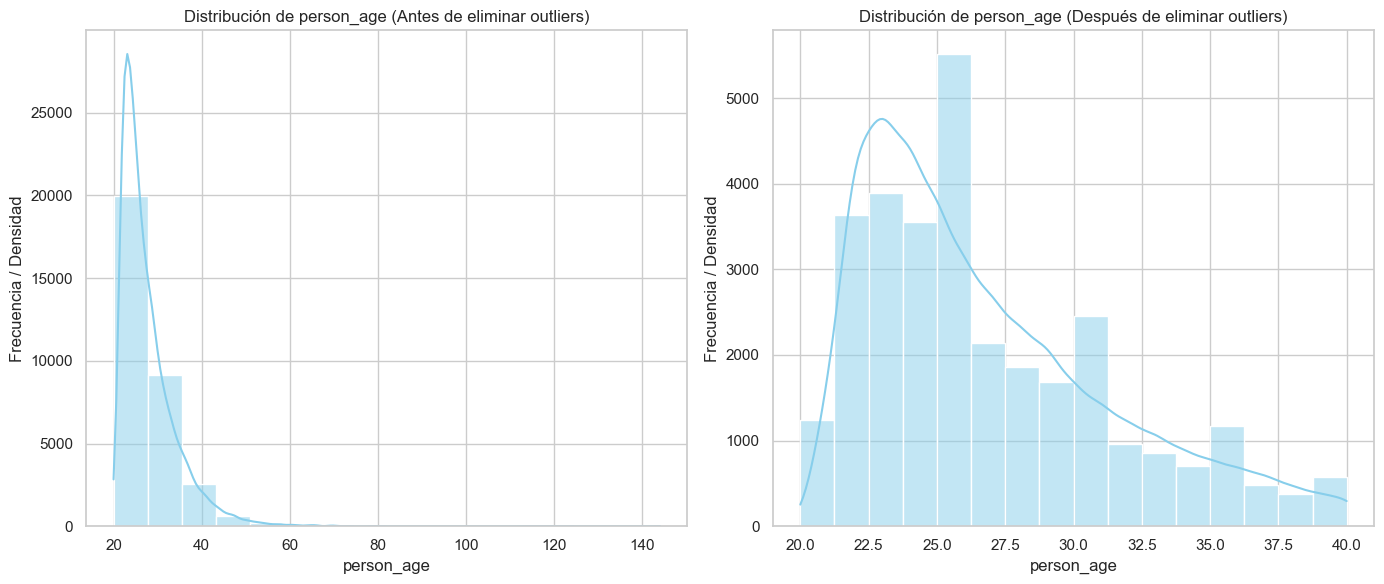

In [12]:
# Calcular percentiles y límites para los outliers
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr

# Identificar outliers
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]

# Eliminar outliers del dataframe
df_no_outliers = df[(df["person_age"] >= lower_limit) & (df["person_age"] <= upper_limit)]

# Graficar la distribución de la variable person_age antes y después de eliminar los outliers
plt.figure(figsize=(14, 6))

# Histograma antes de eliminar outliers
plt.subplot(1, 2, 1)
sns.histplot(df["person_age"], kde=True, color='skyblue', bins=optimal_bins(df, 'person_age'))
plt.title('Distribución de person_age (Antes de eliminar outliers)')
plt.xlabel('person_age')
plt.ylabel('Frecuencia / Densidad')

# Histograma después de eliminar outliers
plt.subplot(1, 2, 2)
sns.histplot(df_no_outliers["person_age"], kde=True, color='skyblue', bins=optimal_bins(df_no_outliers, 'person_age'))
plt.title('Distribución de person_age (Después de eliminar outliers)')
plt.xlabel('person_age')
plt.ylabel('Frecuencia / Densidad')

plt.tight_layout()
plt.show()

# Análisis de variables de texto

<div class="alert alert-block alert-warning">


 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

<div>

In [13]:
def text_variable_statistics(df, qualitative_columns):
    stats = {}
    for col in qualitative_columns:
        stats[col] = {
            'mode': df[col].mode()[0],
            'cardinality': df[col].nunique(),
            'unique_counts': df[col].value_counts().to_dict()
        }
    return stats

text_stats = text_variable_statistics(df, qualitative_columns)
for col, stat in text_stats.items():
    print(f"Statistics for {col}:")
    print(f"Mode: {stat['mode']}")
    print(f"Cardinality: {stat['cardinality']}")
    print(f"Unique Counts: {stat['unique_counts']}")
    print("\n")

Statistics for person_home_ownership:
Mode: RENT
Cardinality: 4
Unique Counts: {'RENT': 16446, 'MORTGAGE': 13444, 'OWN': 2584, 'OTHER': 107}


Statistics for loan_intent:
Mode: EDUCATION
Cardinality: 6
Unique Counts: {'EDUCATION': 6453, 'MEDICAL': 6071, 'VENTURE': 5719, 'PERSONAL': 5521, 'DEBTCONSOLIDATION': 5212, 'HOMEIMPROVEMENT': 3605}


Statistics for loan_grade:
Mode: A
Cardinality: 7
Unique Counts: {'A': 10777, 'B': 10451, 'C': 6458, 'D': 3626, 'E': 964, 'F': 241, 'G': 64}


Statistics for cb_person_default_on_file:
Mode: N
Cardinality: 2
Unique Counts: {'N': 26836, 'Y': 5745}


Statistics for loan_status:
Mode: 0
Cardinality: 2
Unique Counts: {0: 25473, 1: 7108}




<div class="alert alert-block alert-warning">

7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

</div>

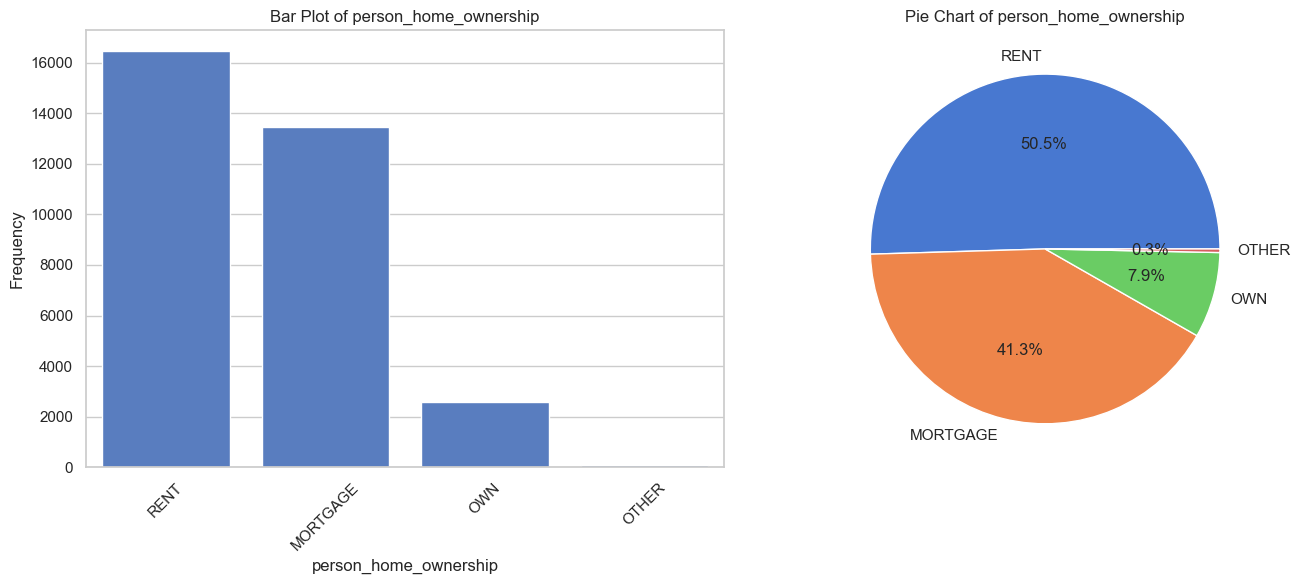

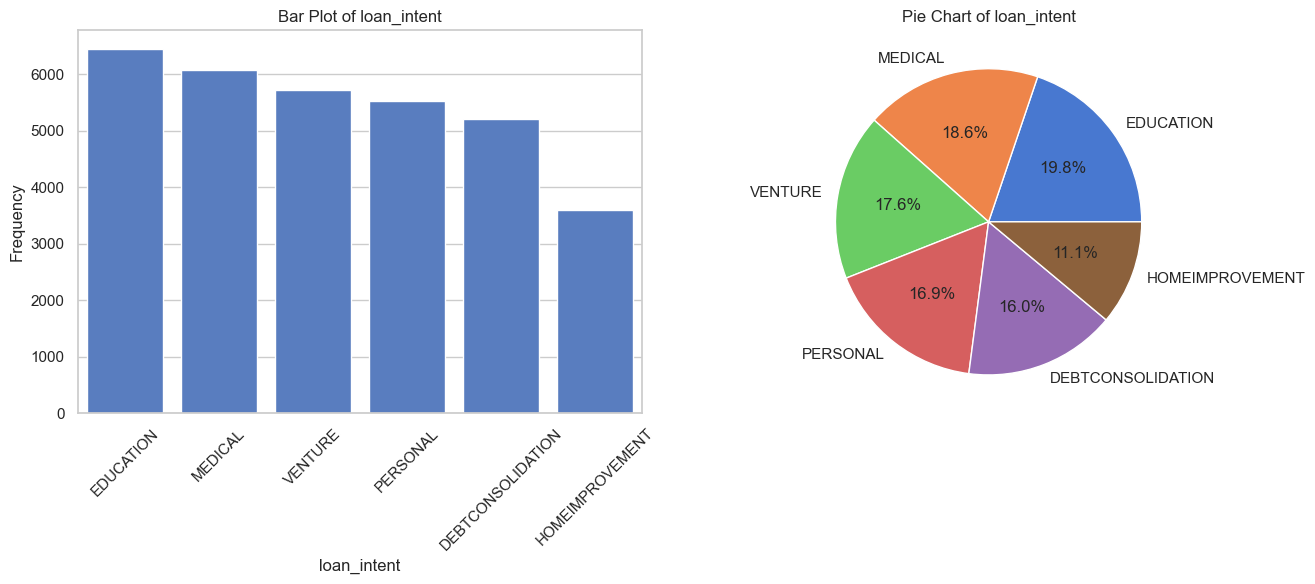

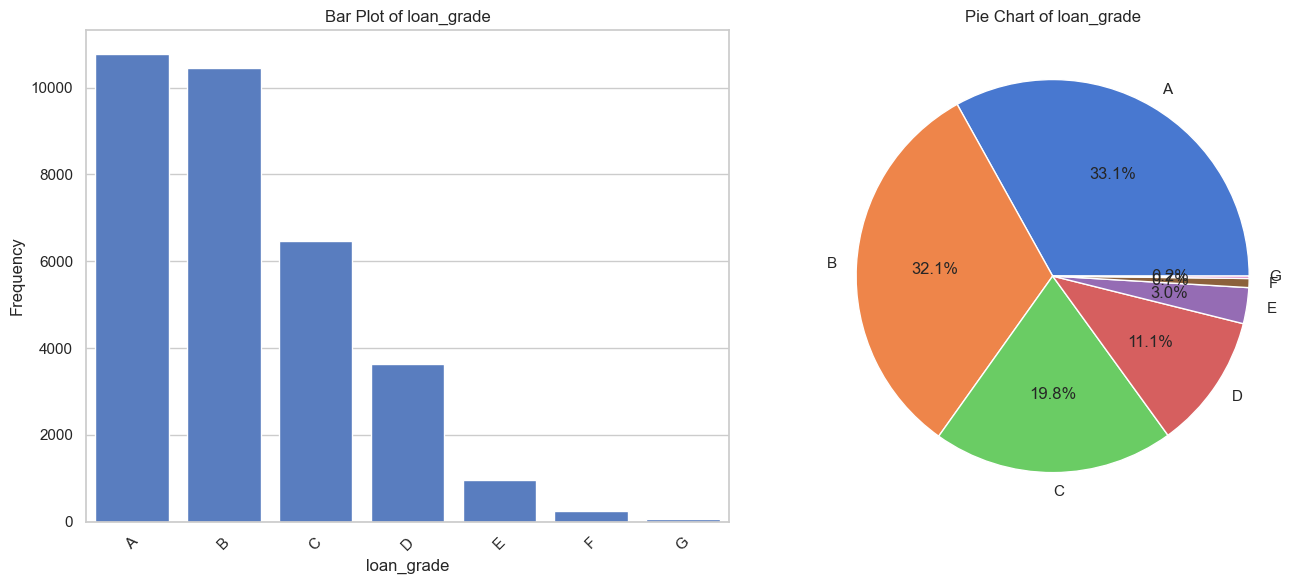

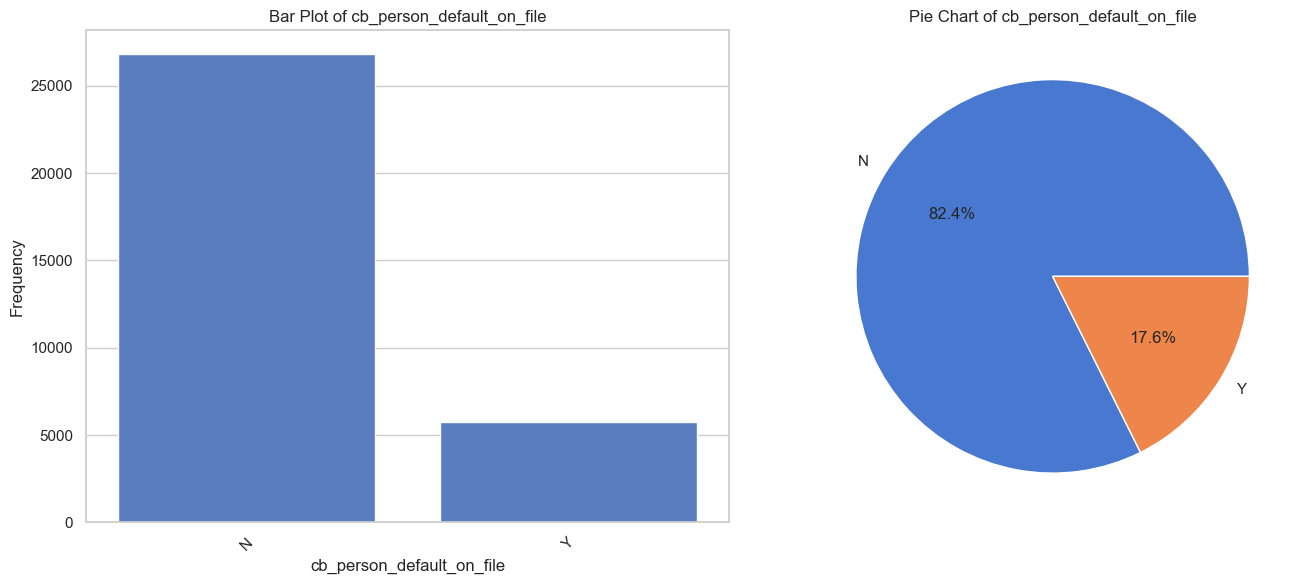

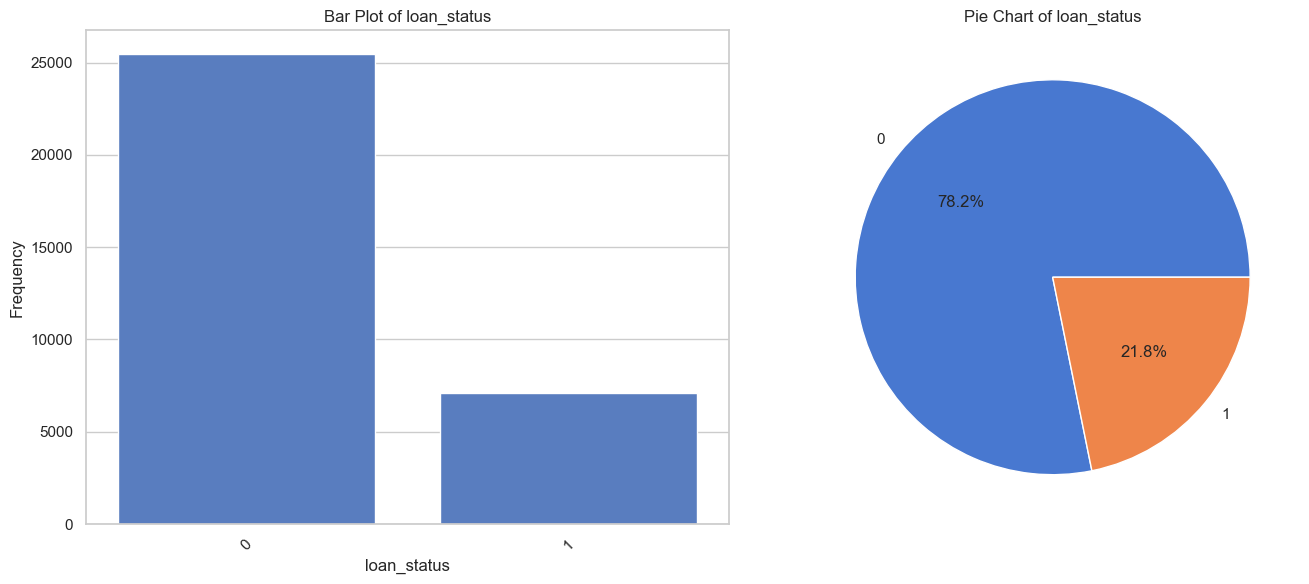

In [14]:
def plot_bar_and_pie_charts(text_stats):
    for col, stat in text_stats.items():
        unique_counts = stat['unique_counts']
        
        # Bar plot
        plt.figure(figsize=(14, 6))
        plt.subplot(1, 2, 1)
        sns.barplot(x=list(unique_counts.keys()), y=list(unique_counts.values()))
        plt.title(f'Bar Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        
        # Pie chart
        plt.subplot(1, 2, 2)
        plt.pie(list(unique_counts.values()), labels=list(unique_counts.keys()), autopct='%1.1f%%')
        plt.title(f'Pie Chart of {col}')
        
        plt.tight_layout()
        plt.show()

plot_bar_and_pie_charts(text_stats)

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

<div class="alert alert-block alert-warning">

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.



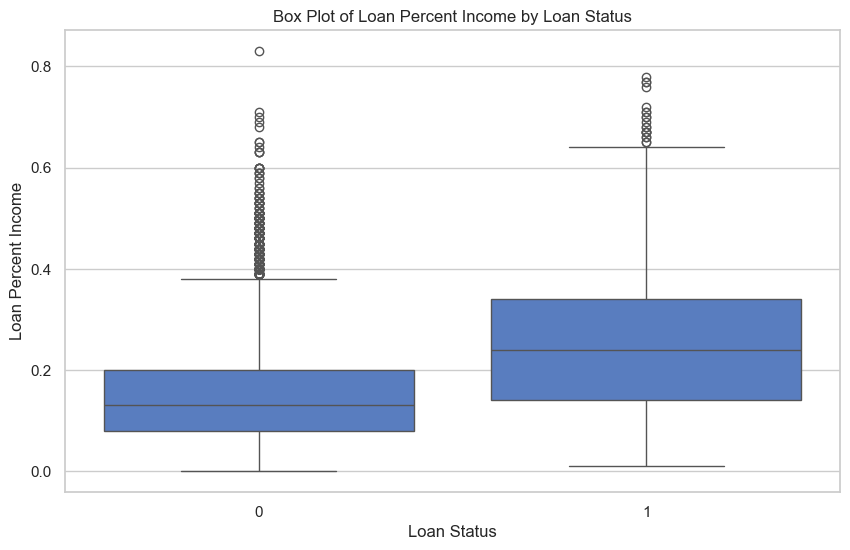

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_percent_income', data=df)
plt.title('Box Plot of Loan Percent Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Percent Income')
plt.show()

La gráfica indica que, en promedio, quienes tienen `loan_status = 1` presentan un **porcentaje de sus ingresos destinado al préstamo** más alto que quienes tienen `loan_status = 0`. Esto se aprecia en la mediana más elevada y el rango superior de la caja del grupo 1 en comparación con el grupo 0.

Además, nos encontramos ante un **dataset desbalanceado**, lo cual puede influir en los resultados y la capacidad de generalización de los modelos.  
**Es muy importante balancear este tipo de conjuntos de datos** para lograr conclusiones más robustas.

<div class="alert alert-block alert-warning">

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

</div>

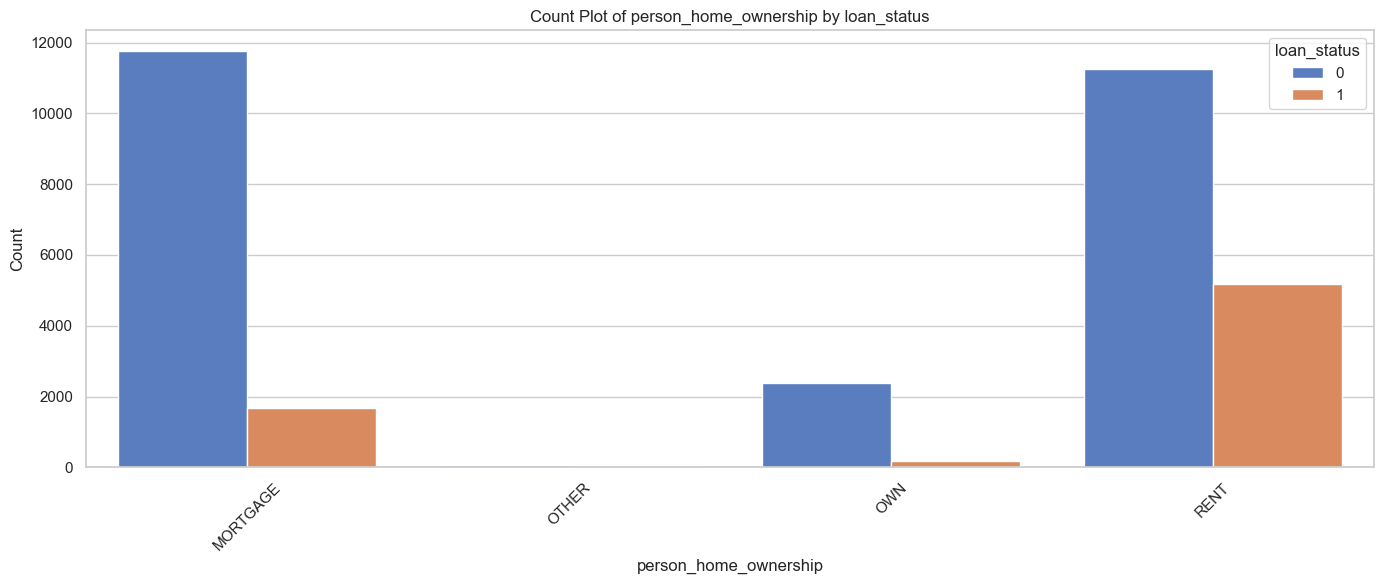

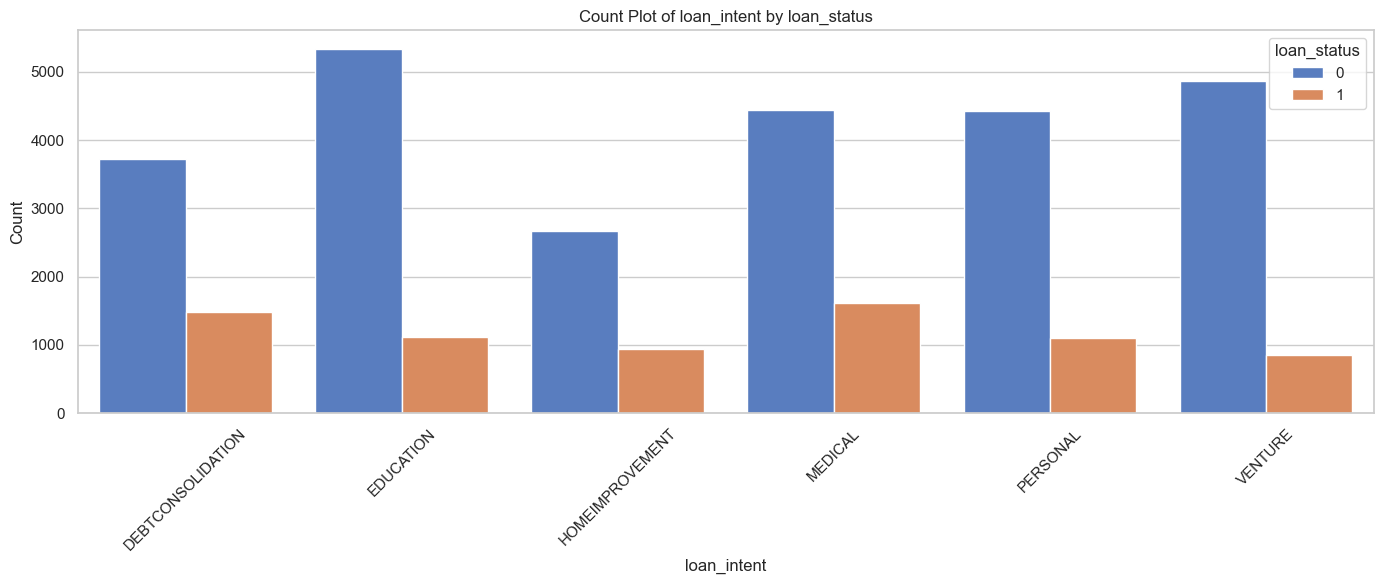

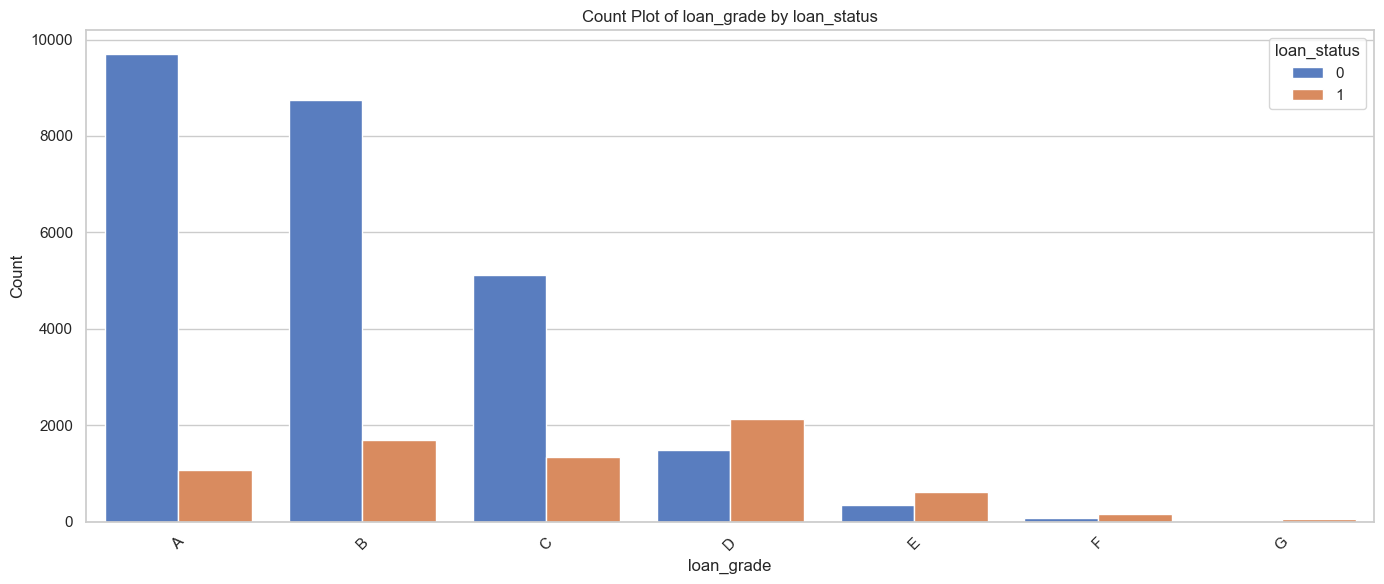

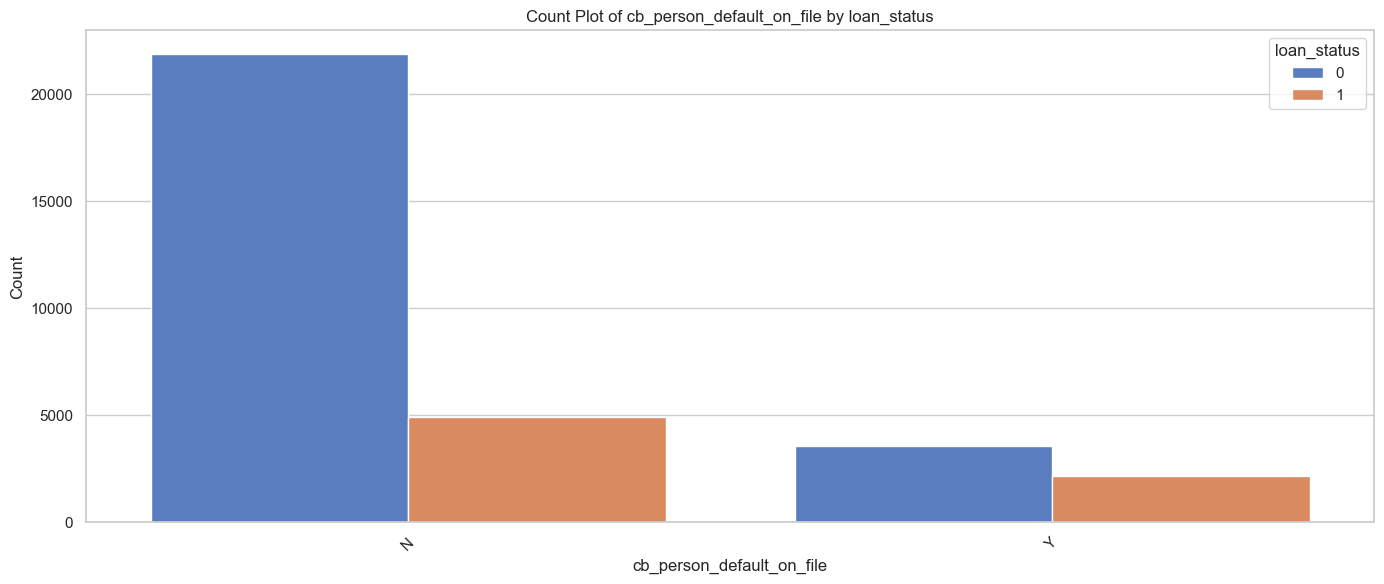

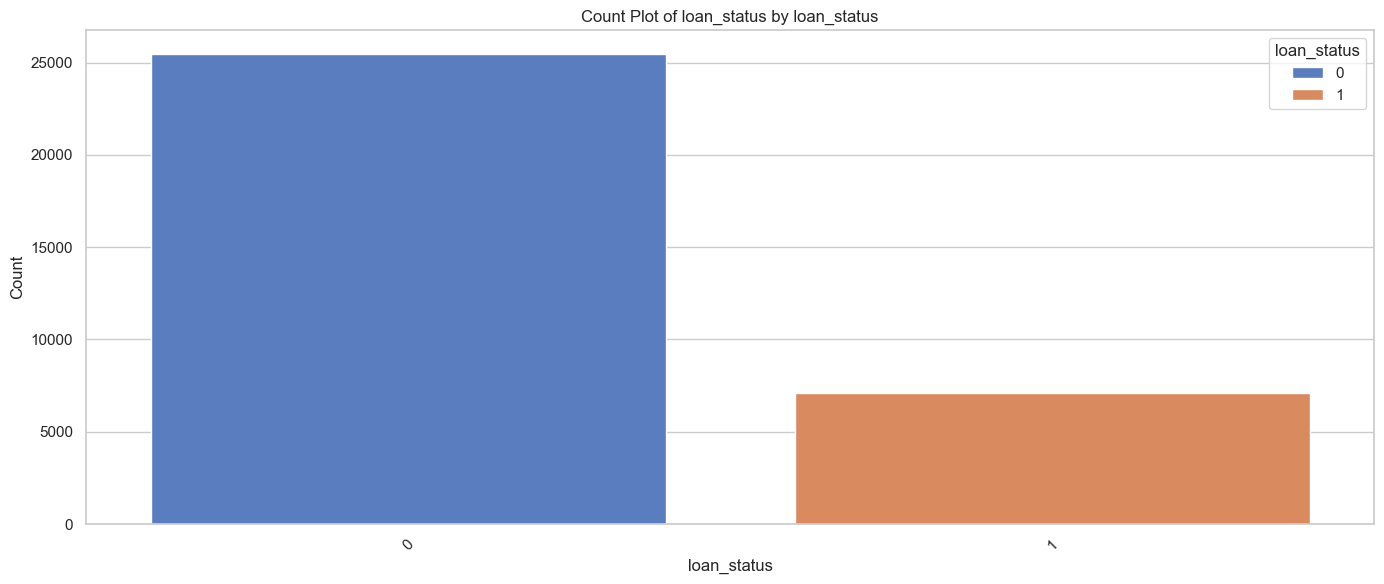

In [16]:
def plot_bar_charts_with_hue(df, qualitative_columns, hue):
    for col in qualitative_columns:
        plt.figure(figsize=(14, 6))
        sns.countplot(x=col, hue=hue, data=df)
        plt.title(f'Count Plot of {col} by {hue}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.legend(title=hue)
        plt.tight_layout()
        plt.show()

plot_bar_charts_with_hue(df, qualitative_columns, 'loan_status')

<div class="alert alert-block alert-warning">


10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

</div>

**La variable con mayor correlación con `loan_int_rate` es `loan_percent_income`,** con un valor de aproximadamente **0.38** en esta matriz de correlación de Pearson.  
No obstante, es importante recordar que **la correlación de Pearson solo mide relaciones lineales** y no necesariamente captura otros patrones (no lineales o con interacciones). Por eso, cualquier interpretación debe considerar estas limitaciones y complementarse con otros métodos o visualizaciones.


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
person_age,1.00,0.17,0.16,0.05,0.01,-0.04,0.86,-0.02
person_income,0.17,1.00,0.13,0.27,0.00,-0.25,0.12,-0.14
person_emp_length,0.16,0.13,1.00,0.11,-0.06,-0.05,0.14,-0.08
loan_amnt,0.05,0.27,0.11,1.00,0.15,0.57,0.04,0.11
loan_int_rate,0.01,0.00,-0.06,0.15,1.00,0.12,0.02,0.34
loan_percent_income,-0.04,-0.25,-0.05,0.57,0.12,1.00,-0.03,0.38
cb_person_cred_hist_length,0.86,0.12,0.14,0.04,0.02,-0.03,1.00,-0.02
loan_status,-0.02,-0.14,-0.08,0.11,0.34,0.38,-0.02,1.00


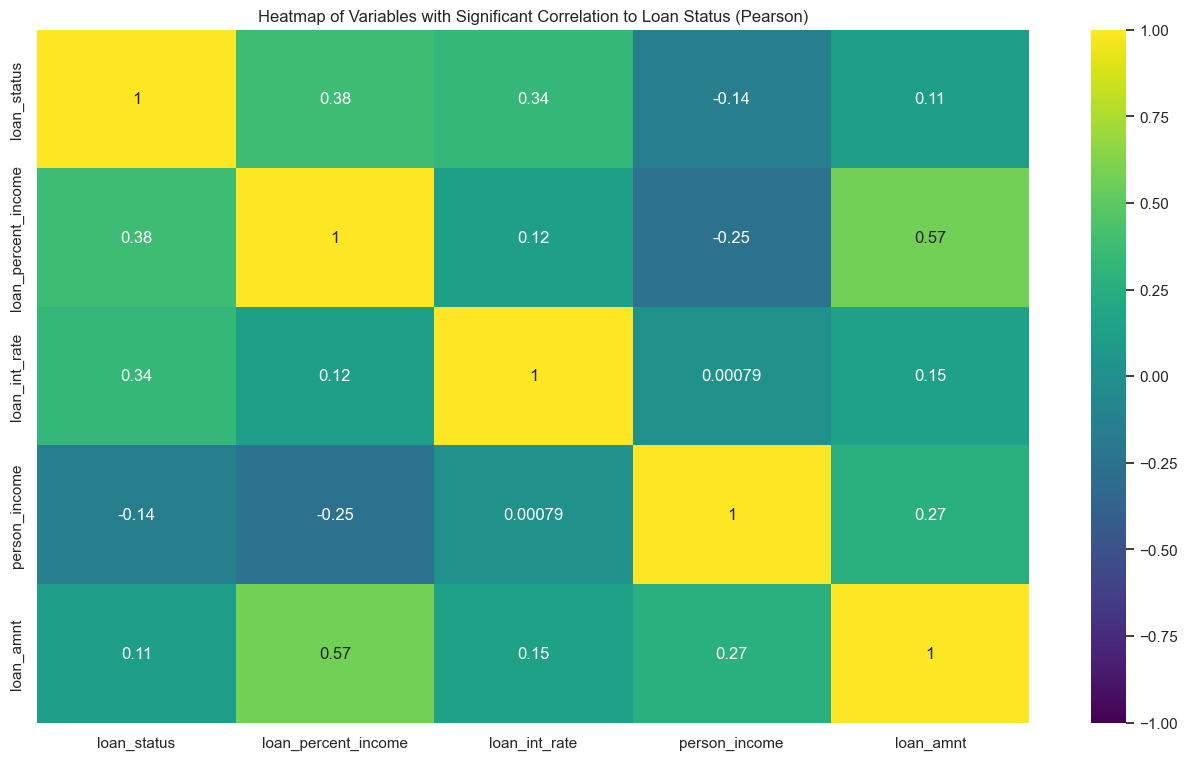

,Feature,Pearson_r,PointBiserial_r,PB_p_value,abs_Pearson_r
0,loan_percent_income,0.38,0.38,0.00,0.38
1,loan_int_rate,0.34,0.34,0.00,0.34
2,person_income,-0.14,-0.14,0.00,0.14
3,loan_amnt,0.11,0.11,0.00,0.11
4,person_emp_length,-0.08,-0.08,0.00,0.08
5,person_age,-0.02,-0.02,0.00,0.02
6,cb_person_cred_hist_length,-0.02,-0.02,0.01,0.02


In [17]:
from scipy.stats import pointbiserialr

# --------------------------------------------------
# 1. Regular Correlation Matrix (Using df.corr())
# --------------------------------------------------

# Let's assume 'df' is your DataFrame
# and 'quantitative_columns' is a list of numeric feature columns (excluding 'loan_status').
# 'loan_status' is assumed binary (0/1).

correlation_matrix = df[quantitative_columns + ['loan_status']].corr()

display(correlation_matrix)

# Identify the absolute correlation with loan_status
correlation_with_loan_status = correlation_matrix["loan_status"].abs().sort_values(ascending=False)

# Filter variables with "significant" correlation (threshold = 0.1 as in your example)
significant_correlations = correlation_with_loan_status[correlation_with_loan_status > 0.1].index

# Create a heatmap with selected variables
plt.figure(figsize=(16, 9))
sns.heatmap(df[significant_correlations].corr(), annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Heatmap of Variables with Significant Correlation to Loan Status (Pearson)')
plt.show()

# --------------------------------------------------
# 2. Point-Biserial Correlation vs. Pearson (Side-by-Side)
# --------------------------------------------------

results = []
for col in quantitative_columns:
    # Skip the target itself if in the list
    if col == 'loan_status':
        continue
    
    # Calculate Pearson correlation directly from the matrix (for reference)
    pearson_corr = correlation_matrix.loc[col, 'loan_status']
    
    # Calculate point-biserial correlation
    # Make sure there are no NaNs or infinite values in the data
    clean_df = df[[col, 'loan_status']].dropna()
    r_pb, p_val = pointbiserialr(clean_df['loan_status'], clean_df[col])
    
    # Store results for comparison
    results.append({
        'Feature': col,
        'Pearson_r': pearson_corr,
        'PointBiserial_r': r_pb,
        'PB_p_value': p_val
    })

compare_df = pd.DataFrame(results)
compare_df['abs_Pearson_r'] = compare_df['Pearson_r'].abs()
compare_df = compare_df.sort_values('abs_Pearson_r', ascending=False).reset_index(drop=True)

display(compare_df)

# --------------------------------------------------
# 3. Interpretation Notes
# --------------------------------------------------
# - "Pearson_r" column: the correlation from the standard correlation matrix df.corr().
# - "PointBiserial_r" column: specifically calculated with pointbiserialr() for a binary vs. continuous variable.
#   Mathematically, if 'loan_status' is coded strictly as 0/1, these two columns should match closely.
# - "PB_p_value": significance test for the point-biserial correlation coefficient.
#
# If you see any small numeric differences between Pearson_r and PointBiserial_r,
# they might be due to floating-point precision or missing-value handling.

*Estimado revisor de la tarea agregue esta nota solo para clarificar el caso especial de correlacion que usamos*
En esta sección, es importante **comunicar claramente** a los alumnos que estamos usando la **correlación *point-biserial*** para el caso de una variable binaria (`loan_status`) frente a variables continuas (edad, ingresos, etc.). También revisaremos el concepto de **p-value** (valor p) para interpretar la significancia estadística de cada correlación y consideraremos el impacto del **desbalance** en la variable `loan_status`.

Cuando una variable es estrictamente binaria (0/1) y la otra es continua, podemos usar la correlación de Pearson de forma directa, **pero** en realidad estamos calculando la ***correlación point-biserial***.  
- **Equivalencia matemática**: Point-biserial es un caso especial de Pearson cuando una de las variables toma solo dos valores (0 y 1).  
- **Interpretación**: Nos da un coeficiente que indica la fuerza y dirección de la relación entre la variable continua y la dicotómica.  

**¿Por qué destacar *point-biserial* si es lo mismo que Pearson?**  
- Porque didácticamente ayuda a los alumnos a entender que hay un tipo especial de correlación para variables binarias vs. continuas.  
- El valor p (p-value) permite saber si la correlación es estadísticamente diferente de cero (si la variable continua realmente discrimina entre 0 y 1 de forma lineal).


En la tabla resultante, además de ver el **coeficiente de correlación** (`PointBiserial_r`), también vemos el **`PB_p_value`**. indica que la correlación es estadísticamente significativa.  
- Esto **no** implica necesariamente que la correlación sea alta en magnitud (podría ser significativa pero débil).



### 4. Considerar el Desbalance de `loan_status`

Un punto crucial es ver la **distribución de la variable `loan_status`** (0/1). Si está muy desbalanceada (p.ej., 80% de los casos son 0 y solo 20% son 1), esto puede:  
- **Limitar** la fuerza máxima observable de la correlación.  
- Hacer que ciertas variables parezcan poco correlacionadas cuando en realidad podrían tener una influencia clara en predicciones específicas.

En el código, mostramos una **gráfica de barras** con los porcentajes de cada clase. Esto nos ayuda a dimensionar si la variable está equilibrada (50/50) o hay un **sesgo** importante.

---




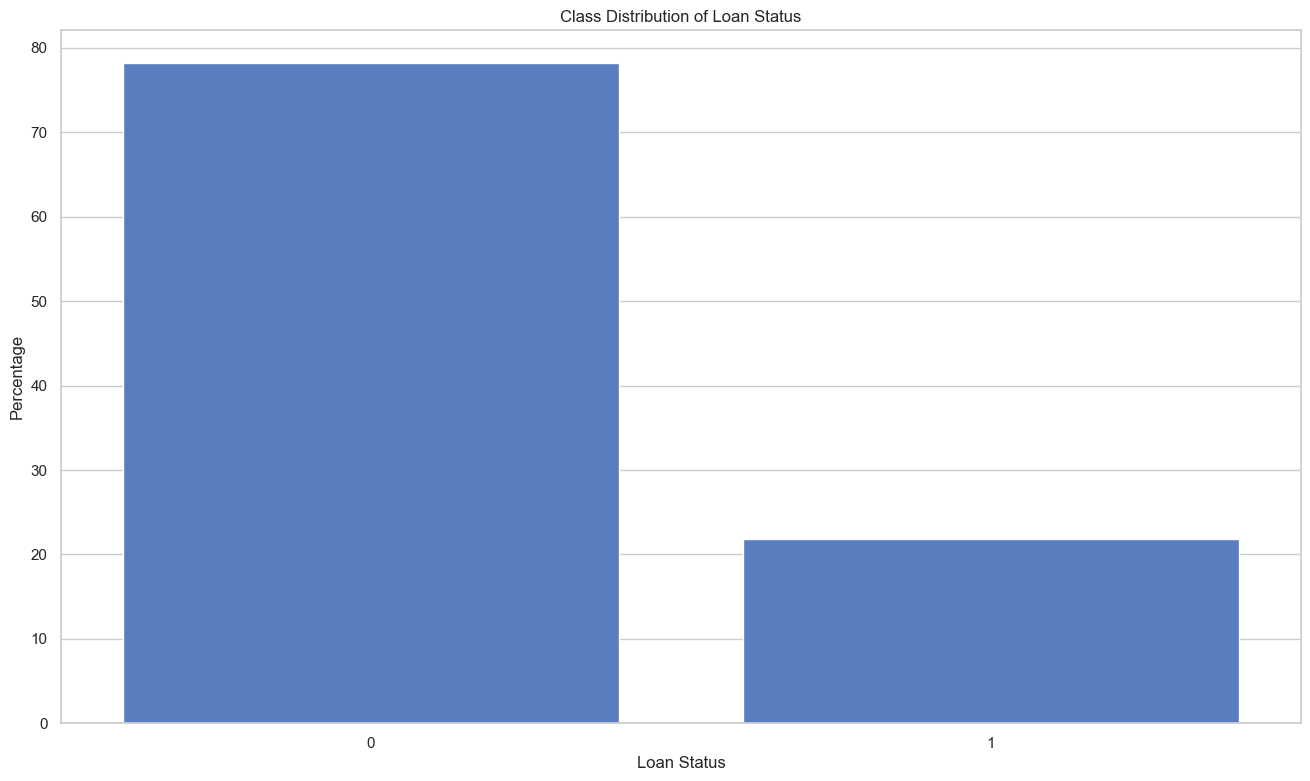

loan_status
0   78.18
1   21.82
Name: proportion, dtype: float64


In [18]:
loan_status_counts = df['loan_status'].value_counts(normalize=True) * 100

plt.figure(figsize=(16,9))
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values)
plt.title('Class Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

print(loan_status_counts)